In [1]:
import numpy as np
from scipy.signal import chirp, spectrogram
import simpleaudio as sa
from scipy.io.wavfile import write, read
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from transmitter import *
from reciever import *
import random

In [2]:
fs = 44100
class OFDM:
    pass
ofdm = OFDM()
ofdm.N = 2048                   # Length of DTF
ofdm.start_bin = 50
ofdm.end_bin = 788
ofdm.CP = 256                      
ofdm.sfp = 60                   # Symbols per frame

ofdm.num_tones = 21             # Number of pilot tones
ofdm.pilot_locs = np.int64(np.linspace(49,789,ofdm.num_tones))     # Pilot locations
ofdm.pilot_vals = np.array([1+1j]*21)

ofdm.rate = "1/2"
ofdm.z = 81

ofdm.bps = 2                    # bits per symbol QFSK
ofdm.spb = 720                  # data symbols per block
ofdm.preamb = ofdm.N//2
ofdm.QFSK_dict = {              # The constellation
    (1,1) : -1-1j,
    (1,0) :  1-1j,
    (0,0) :  1+1j,
    (0,1) : -1+1j}

b'ID3\x02\x00\x00\x00\x00\x1fvTSS\x00\x00\x12\x00GarageBand 10.4.4COM\x00\x00h\x00engiTunNORM\x00 0000094C 000008CA 00008384 0000708E 00000AB6 00000AB6 00007E86 00007E86 000008AC 000008AC\x00COM\x00\x00\x82\x00engiTunSMPB\x00 00000000 00000210 00000870 0000000000030000 00000000 000086B2 00000000 00000000 00000000 00000000 00000000 00000000\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

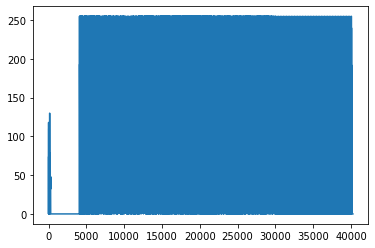

In [34]:
f = open("despacito.mp3", "rb")
bytes = f.read()
print(bytes)
plt.figure(figsize = (30, 10))

byte_array = [i for i in bytes]
print(byte_array)
plt.plot(byte_array)
bin_byte_array = ["{0:08b}".format(i) for i in byte_array] # Binary bytes
print(bin_byte_array)
bitty = np.array([bity for bytey in bin_byte_array for bity in bytey]).astype(int)
print(np.shape(bitty))

Length of bytes: 26800.0
256
(449, 2304)


-0.03462463461469957

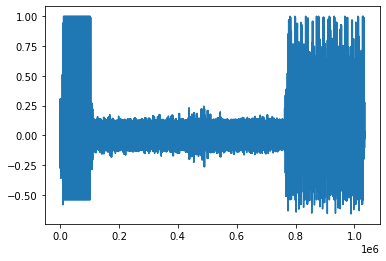

In [31]:
bit_array = bitsFromTiff('jaguar.tiff')
print('Length of bytes:', len(bit_array)/8)

payload = fullTrans(bitty, ofdm, ldpc_encode=True)
payload = payload / np.max(np.abs(payload.flatten()))
plt.plot((payload.flatten()))
print(np.shape(payload))

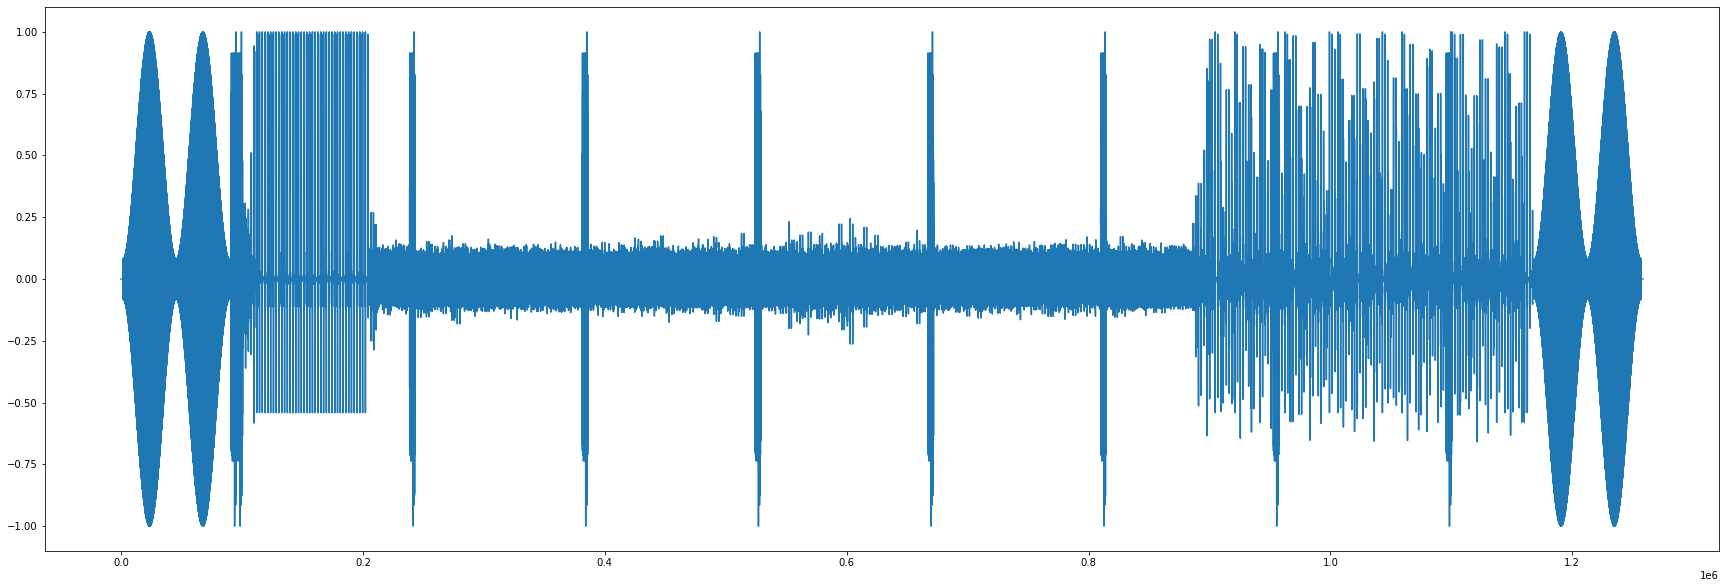

In [33]:
x = CUSTARD(payload, ofdm)
plt.figure(figsize = (30, 10))
plt.plot(x)
audioMaker(x, 'despacito3', fs)
plt.show()
